In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import math

In [307]:
data = pd.read_csv("../data from book/Credit.csv")


x_data = np.array(data[["Limit","Rating","Cards","Age","Education"]])

y_data = np.array(data["Income"])
x_test = x_data[300:400]
y_test = y_data[300:400]
x_data = x_data[0:300]
y_data = y_data[0:300]
sample_size = x_data.shape[0]
test_size = x_test.shape[0]

x_data

array([[3606,  283,    2,   34,   11],
       [6645,  483,    3,   82,   15],
       [7075,  514,    4,   71,   11],
       ...,
       [4381,  321,    3,   74,   17],
       [2672,  204,    1,   70,   18],
       [5051,  372,    3,   76,   11]], dtype=int64)

In [308]:
def min__j(x_data,y_data,w,b):
    j= 0
    for i in range(x_data.shape[0]):
        j+=(np.dot(x_data[i],w)+b- (y_data[i]))**2
    ghj = (2*x_data.shape[0])
    return j/ghj

In [309]:

def gradient(x_data,y_data, w, b):
    j_i = np.zeros(w.shape[0])
    j_j = 0
    m = x_data.shape[0]
    for i in range(x_data.shape[0]):
        k = (np.dot(x_data[i],w)+b- (y_data[i]))
        if(math.isnan(k)==True):
            # print("k is NA")
            pass
        for gb in range(w.shape[0]): 
            j_i[gb] += (k*x_data[i][gb])
        
        j_j += k

    # # matrix style
    # err = x_data@w +b - y_data
    # dj_db = np.sum(err)
    # dj_dw = (x_data.T @ err)


    grad = [1/m * j_i, 1/m * j_j]
    return grad

In [310]:
# fixing learning rate
fix = []

In [311]:
def gradient_descent(x_data,y_data,w,b):
    dist = 0.00000006
    hist =[]
    count =0
    iter = 50
    for i in range(iter):
        count +=1
        dj_dw,dj_db =  gradient(x_data,y_data,w,b)


        w = w-(dist*dj_dw)
        b = b-(dist*dj_db)

        value_j = min__j(x_data,y_data,w,b)
        fix.append([i,value_j])
        if i ==iter-1 or i==0 or i%10 ==0:
            print(w,b,"-------------------------------- j: ",value_j,"dj_dw: ",dj_dw,"dj_db: ",dj_db)
      
    return w,b


In [312]:
def predict_graph(x_data,w,b):
    # pred = np.zeros([x_data.shape[0],])
    pred = np.zeros([x_data.shape[0]])
    for i in range(test_size):
        pred[i] = np.dot(x_data[i],w) +b
    return pred

In [313]:
# w = np.zeros([5])
w = np.zeros(x_data.shape[1])

b=0
per_w,per_b = gradient_descent(x_data,y_data,w,b)
print(per_w, per_b)


[1.57270023e-02 1.15576856e-03 8.07927620e-06 1.49630784e-04
 3.49602264e-05] 2.6432636000000007e-06 -------------------------------- j:  700.6402174466953 dj_dw:  [-2.62116704e+05 -1.92628093e+04 -1.34654603e+02 -2.49384639e+03
 -5.82670440e+02] dj_db:  -44.05439333333335
[9.90043084e-03 6.95845336e-04 1.43476624e-06 6.61749123e-05
 5.76635104e-06] 5.053201923583565e-07 -------------------------------- j:  241.76060843567117 dj_dw:  [-1440.28374017   -55.14078948     5.0950475     31.06406497
    22.75388242] dj_db:  1.6095596378269141
[ 9.87103393e-03  6.63096440e-04 -2.10070141e-06  3.88934679e-05
 -9.95885658e-06] -6.167716957432897e-07 -------------------------------- j:  241.74364050739206 dj_dw:  [-12.0990498   50.06856454   5.85885849  44.86066628  26.06342058] dj_db:  1.859210656769332
[ 9.87339699e-03  6.32702788e-04 -5.61802980e-06  1.19418412e-05
 -2.56058138e-05] -1.7329797131193594e-06 -------------------------------- j:  241.74044991726404 dj_dw:  [-4.27217588 50.6202221

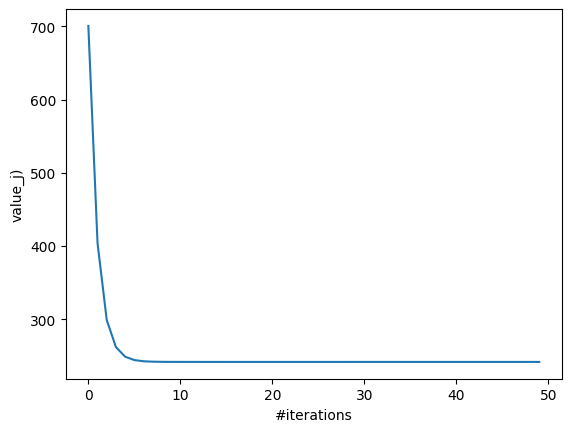

In [314]:
fix = np.array(fix)
pl.plot(fix[:,0], fix[:,1])
pl.xlabel("#iterations")
pl.ylabel("value_j)")
pl.show()

In [315]:
def show_predictions(x_test,y_test,per_w,per_b):
    print(per_w,per_b)
    pred = predict_graph(x_test,per_w,per_b)
    print(" Limit","Rating","Cards","Age","Education")
    for i in range(test_size):
        print(x_test[i],"       ",round(pred[i],3),y_test[i]) 


show_predictions(x_test,y_test,per_w,per_b)


[ 9.87821465e-03  5.75020403e-04 -1.22977159e-05 -3.92020049e-05
 -5.53219213e-05] -3.852835954710098e-06
 Limit Rating Cards Age Education
[4632  355    1   50   17]         45.957 21.786
[3526  289    3   38    7]         34.995 31.335
[4964  365    1   46   13]         49.243 59.855
[4970  352    1   79   11]         49.293 44.061
[7506  536    2   64   13]         74.451 82.706
[1924  165    2   50   14]         19.098 24.46
[3762  287    3   80    8]         37.323 45.12
[3874  298    3   41   14]         38.437 75.406
[4640  332    2   33    6]         46.024 14.956
[7010  494    3   34   18]         69.528 75.257
[4891  369    1   52   16]         48.524 33.694
[5429  396    3   57   15]         53.853 23.375
[5227  386    6   63   11]         51.852 27.825
[7685  534    2   75   18]         76.217 92.386
[9272  656    2   69   14]         91.965 115.52
[3907  296    3   43   16]         38.762 14.479
[7306  522    2   57   14]         72.467 52.179
[4712  340    2   71   16]   

In [316]:
def accuracy(x_test,y_test,w,b,):
    pred = predict_graph(x_test,w,b)
    error = 0
    for i in range(pred.shape[0]):
        error += abs(y_test[i] - pred[i])/y_test[i]

    # t =np.sum(y_test)
    # k = np.sum(pred)
    error /= y_test.shape[0]  
    error *= 100
    return error

In [317]:
print(per_w,per_b)

[ 9.87821465e-03  5.75020403e-04 -1.22977159e-05 -3.92020049e-05
 -5.53219213e-05] -3.852835954710098e-06


In [318]:
print(accuracy(x_test, y_test,per_w,per_b))

61.37759967211907
